<ipython-input-1-ba5c9859d9ad>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


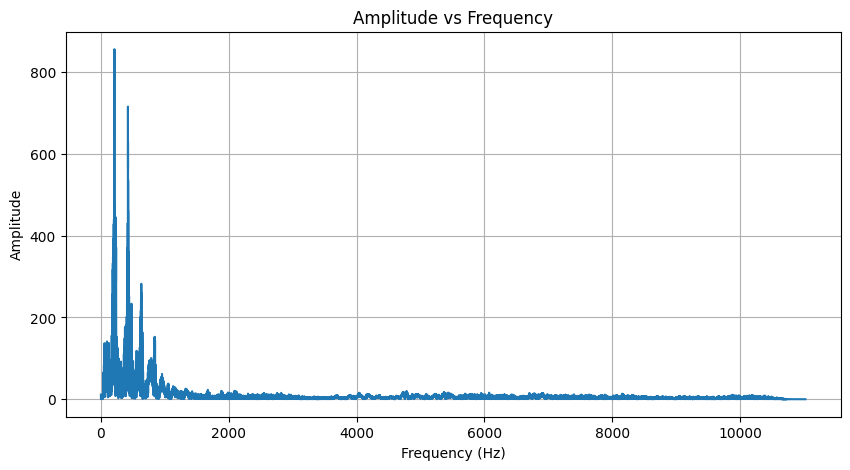

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

file_path = "/content/audioai.unknown"
y, sr = librosa.load(file_path)

fft_result = np.fft.fft(y)

freqs = np.fft.fftfreq(len(y), 1 / sr)

positive_freqs = freqs[:len(freqs)//2]
amplitude = np.abs(fft_result)[:len(fft_result)//2]

plt.figure(figsize=(8, 4))
plt.plot(positive_freqs, amplitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude vs Frequency')
plt.grid(True)
plt.show()


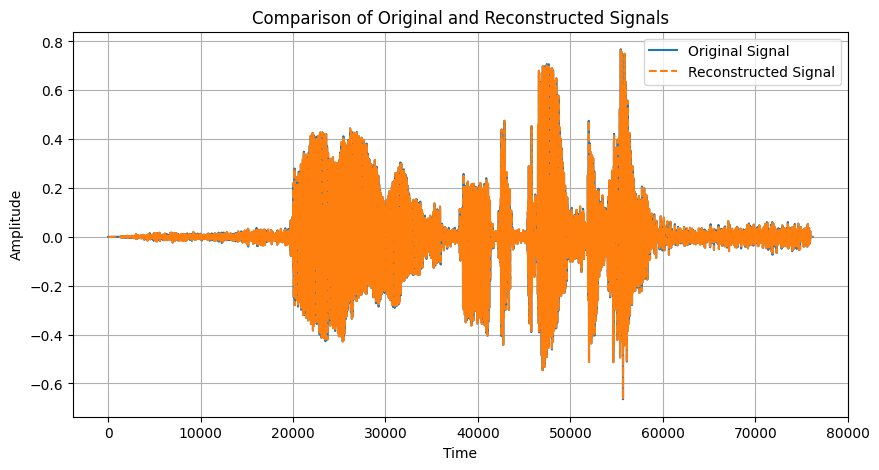

In [4]:
reconstructed_signal = np.fft.ifft(fft_result)

plt.figure(figsize=(10, 5))
plt.plot(y, label='Original Signal')
plt.plot(reconstructed_signal.real, label='Reconstructed Signal', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Comparison of Original and Reconstructed Signals')
plt.legend()
plt.grid(True)
plt.show()


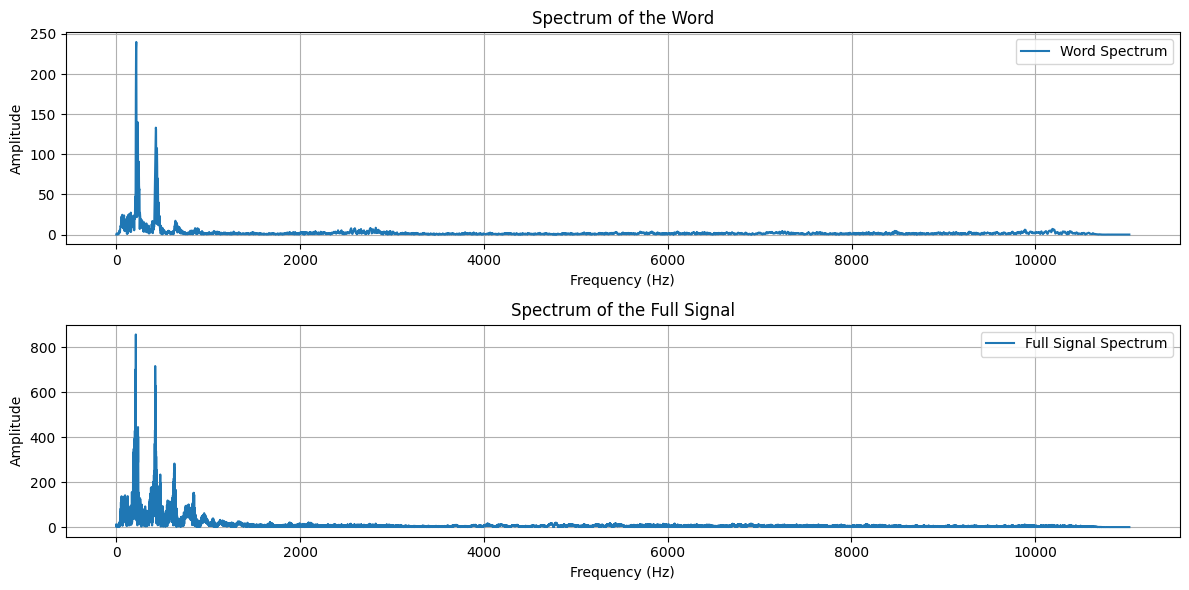

In [5]:
word_start_time = 1.5
word_end_time = 1.9
word_segment = y[int(word_start_time * sr):int(word_end_time * sr)]

fft_result_word = np.fft.fft(word_segment)
freqs_word = np.fft.fftfreq(len(word_segment), 1 / sr)
positive_freqs_word = freqs_word[:len(freqs_word) // 2]
amplitude_word = np.abs(fft_result_word)[:len(fft_result_word) // 2]

fft_result_full = np.fft.fft(y)
freqs_full = np.fft.fftfreq(len(y), 1 / sr)
positive_freqs_full = freqs_full[:len(freqs_full) // 2]
amplitude_full = np.abs(fft_result_full)[:len(fft_result_full) // 2]

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(positive_freqs_word, amplitude_word, label="Word Spectrum")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of the Word')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(positive_freqs_full, amplitude_full, label="Full Signal Spectrum")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of the Full Signal')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

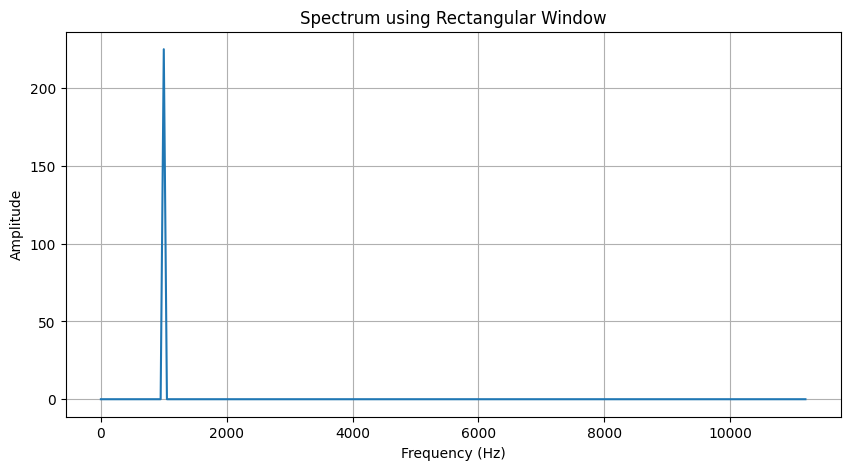

In [6]:
sampling_rate = 22500
window_duration_ms = 20
window_duration_samples = int((window_duration_ms / 1000) * sampling_rate)

rectangular_window = np.ones(window_duration_samples)

frequency = 1000
time = np.arange(0, window_duration_samples) / sampling_rate
test_signal = np.sin(2 * np.pi * frequency * time)

windowed_signal = test_signal * rectangular_window

fft_result = np.fft.fft(windowed_signal)
freqs = np.fft.fftfreq(len(windowed_signal), 1 / sampling_rate)
positive_freqs = freqs[:len(freqs) // 2]
amplitude = np.abs(fft_result)[:len(fft_result) // 2]

plt.figure(figsize=(10, 5))
plt.plot(positive_freqs, amplitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum using Rectangular Window')
plt.grid(True)
plt.show()


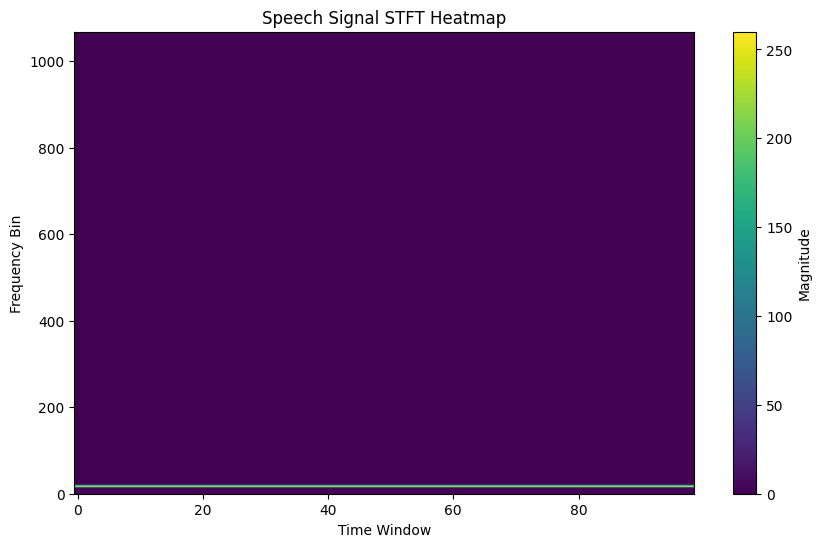

In [9]:
fs = 53400
duration = 1.0
t = np.linspace(0, duration, int(fs * duration))
speech_signal = np.sin(2 * np.pi * 440 * t)

window_size = int(0.02 * fs)
hop_size = int(0.01 * fs)
n_fft = 2 * window_size
n_windows = (len(speech_signal) - window_size) // hop_size + 1

frequency_matrix = np.zeros((n_fft // 2 + 1, n_windows), dtype=complex)

for i in range(n_windows):
    start = i * hop_size
    end = start + window_size
    windowed_signal = speech_signal[start:end] * np.hanning(window_size)
    frequency_matrix[:, i] = np.fft.rfft(windowed_signal, n=n_fft)

plt.figure(figsize=(10, 6))
plt.imshow(np.abs(frequency_matrix), aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Magnitude')
plt.xlabel('Time Window')
plt.ylabel('Frequency Bin')
plt.title('Speech Signal STFT Heatmap')
plt.show()